In [1]:
import pandas as pd
df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv",parse_dates=["Date"]).drop("Unnamed: 0",axis=1)
df.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [2]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Hour"] = df["Date"].dt.hour

In [3]:
df_2014_to_2016 = df[df["Year"].isin([2014,2015,2016])]

In [4]:
df_2014_to_2016.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1222
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        4
Community Area              1
FBI Code                    0
X Coordinate            22451
Y Coordinate            22451
Year                        0
Updated On                  0
Latitude                22451
Longitude               22451
Location                22451
Month                       0
Day                         0
Hour                        0
dtype: int64

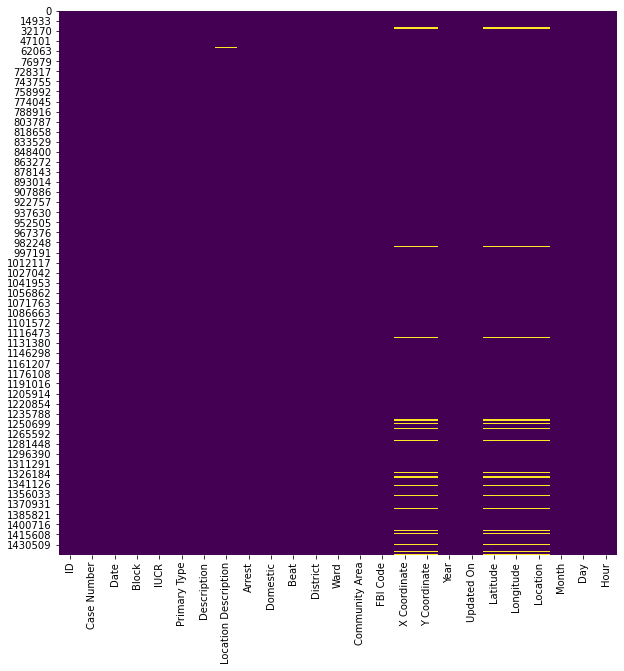

In [5]:
# taking look on null values on our dataset
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df_2014_to_2016.isnull(),cmap="viridis",cbar=False)
plt.show()

In [6]:
df_2014_to_2016.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
0,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,3,23
1,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,3,21
2,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,3,23
3,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,3,22
4,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,3,22


In [7]:
df_2014_to_2016.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day,Hour
count,8.029840e+05,802984.000000,802984.000000,802980.000000,802983.000000,7.805330e+05,7.805330e+05,802984.000000,780533.000000,780533.000000,802984.000000,802984.000000,802984.000000
mean,1.011643e+07,1144.666125,11.217551,22.875917,37.355352,1.164367e+06,1.885645e+06,2014.988711,41.841806,-87.672347,6.599836,15.696221,13.231823
std,6.068658e+05,690.038399,6.893427,13.822825,21.379132,1.846077e+04,3.403720e+04,0.819970,0.093719,0.066471,3.329724,8.842719,6.574797
min,2.121200e+04,111.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,2014.000000,36.619446,-91.686566,1.000000,1.000000,0.000000
25%,9.791518e+06,612.000000,6.000000,10.000000,23.000000,1.152494e+06,1.858796e+06,2014.000000,41.767958,-87.715494,4.000000,8.000000,9.000000
50%,1.014007e+07,1024.000000,10.000000,23.000000,32.000000,1.166023e+06,1.891863e+06,2015.000000,41.858996,-87.666120,7.000000,16.000000,14.000000
75%,1.048230e+07,1654.000000,16.000000,34.000000,56.000000,1.176363e+06,1.908480e+06,2016.000000,41.904550,-87.628077,9.000000,23.000000,19.000000
max,1.082787e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951535e+06,2016.000000,42.022671,-87.524529,12.000000,31.000000,23.000000


In [8]:
df_2014_to_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802984 entries, 0 to 1456713
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    802984 non-null  int64         
 1   Case Number           802984 non-null  object        
 2   Date                  802984 non-null  datetime64[ns]
 3   Block                 802984 non-null  object        
 4   IUCR                  802984 non-null  object        
 5   Primary Type          802984 non-null  object        
 6   Description           802984 non-null  object        
 7   Location Description  801762 non-null  object        
 8   Arrest                802984 non-null  bool          
 9   Domestic              802984 non-null  bool          
 10  Beat                  802984 non-null  int64         
 11  District              802984 non-null  float64       
 12  Ward                  802980 non-null  float64       
 13

In [9]:
# setting index of dataframe to date
df_2014_to_2016.set_index(df_2014_to_2016["Date"],drop=True,inplace=True)

In [10]:
df_2014_to_2016.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,3,23
2016-05-03 21:40:00,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,3,21
2016-05-03 23:31:00,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,3,23
2016-05-03 22:10:00,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,3,22
2016-05-03 22:00:00,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,3,22


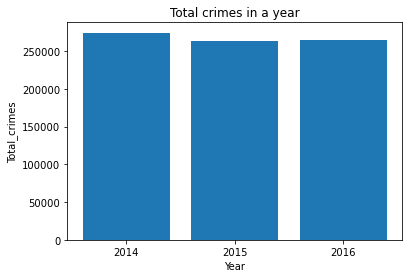

In [11]:
# Crimes in a year 
import matplotlib.pyplot as plt
crime_count = df_2014_to_2016["Year"].value_counts().to_frame()
crime_count.columns = ["count"]

x = list(crime_count.index)
y = list(crime_count["count"])
plt.bar(x,y)
plt.xticks([2014,2015,2016])
plt.xlabel("Year")
plt.ylabel("Total_crimes")
plt.title("Total crimes in a year")
plt.show()

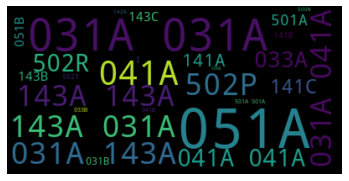

In [12]:
# Analysing most frequent crime code
from wordcloud import WordCloud
crimes_type_code = " ".join(code for code in df_2014_to_2016["IUCR"])
crimes_type_code_wordcloud = WordCloud().generate(crimes_type_code)

plt.imshow(crimes_type_code_wordcloud,interpolation = "bilinear")
plt.axis("off")
plt.show()

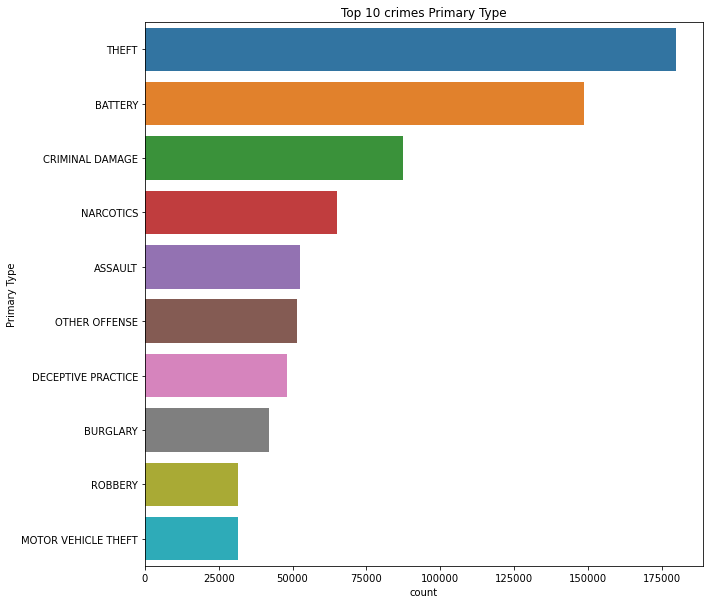

In [13]:
# Analysing top 10 Primary Type crime
plt.figure(figsize=(10,10))
sns.countplot(y="Primary Type",data=df_2014_to_2016,order=df_2014_to_2016["Primary Type"].value_counts().iloc[0:10].index)
plt.title("Top 10 crimes Primary Type")
plt.show()

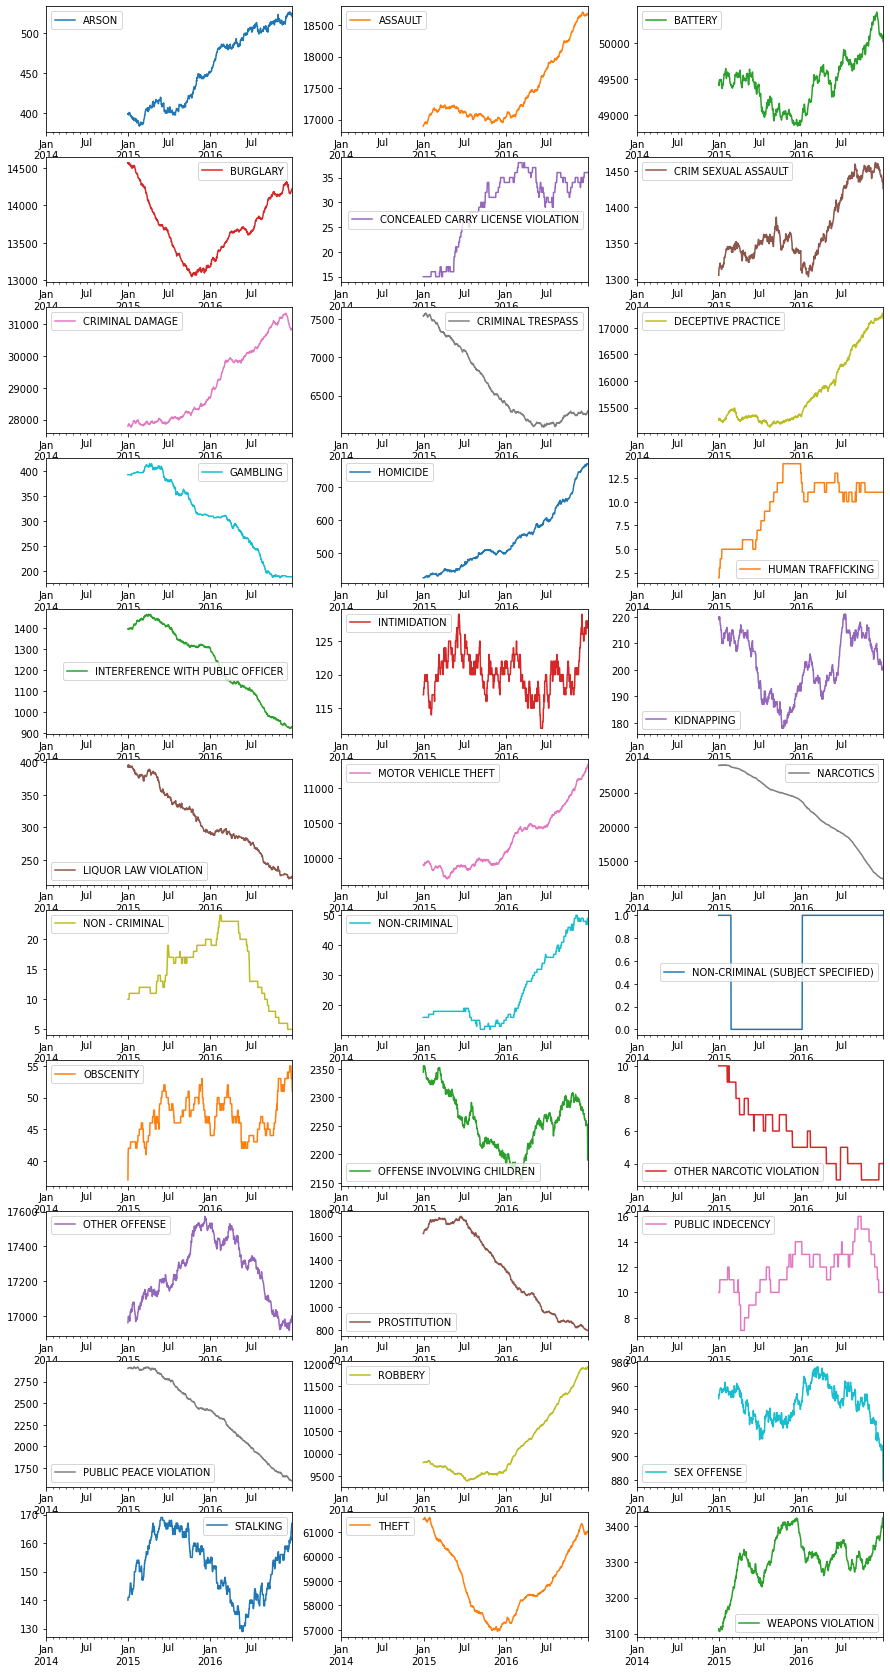

In [14]:
# Individually yearly crime trends
import warnings
warnings.filterwarnings("ignore")
import numpy as np
crime_count_date = df_2014_to_2016.pivot_table("ID",aggfunc=np.size,columns = "Primary Type", index = df_2014_to_2016.index.date,fill_value=0)
crime_count_date.index = pd.DatetimeIndex(crime_count_date.index)
plot = crime_count_date.rolling(365).sum().plot(figsize=(15,30),subplots=True,layout=(-1,3),sharex=False,sharey=False)

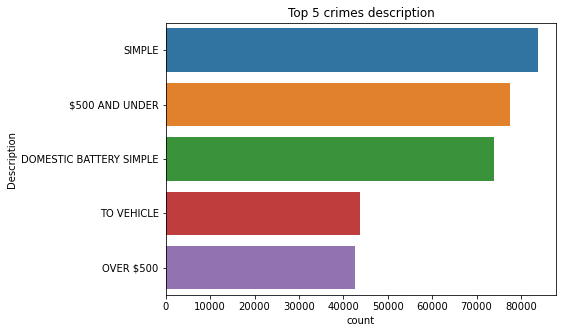

In [15]:
#Top 5 Crime Description
plt.figure(figsize=(7,5))
sns.countplot(y="Description",data=df_2014_to_2016,order=df_2014_to_2016["Description"].value_counts().iloc[0:5].index)
plt.title("Top 5 crimes description")
plt.show()

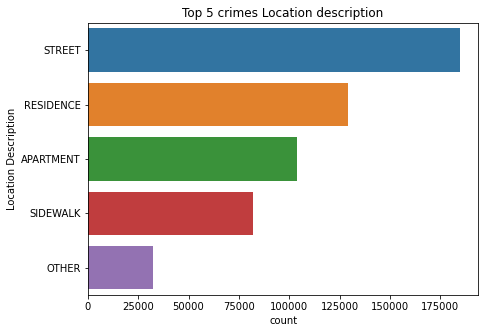

In [16]:
# analysing top 5 location Description
plt.figure(figsize=(7,5))
sns.countplot(y="Location Description",data=df_2014_to_2016,order=df_2014_to_2016["Location Description"].value_counts().iloc[0:5].index)
plt.title("Top 5 crimes Location description")
plt.show()

In [17]:
# major crime monthly arrest analysis
df_2014_to_2016["Details"] = df_2014_to_2016["Primary Type"] + " " + df_2014_to_2016["Description"]
top_crimes = df_2014_to_2016.groupby(["Details"])["Arrest"].count()
top_crimes = pd.DataFrame(top_crimes).nlargest(10,"Arrest").reset_index()
top_crimes = list(top_crimes["Details"])
df_ = df_2014_to_2016.groupby(["Details","Month"])["Arrest"].count()

<AxesSubplot:title={'center':'Major crime monthly arrest analysis'}, xlabel='Month', ylabel='Details'>

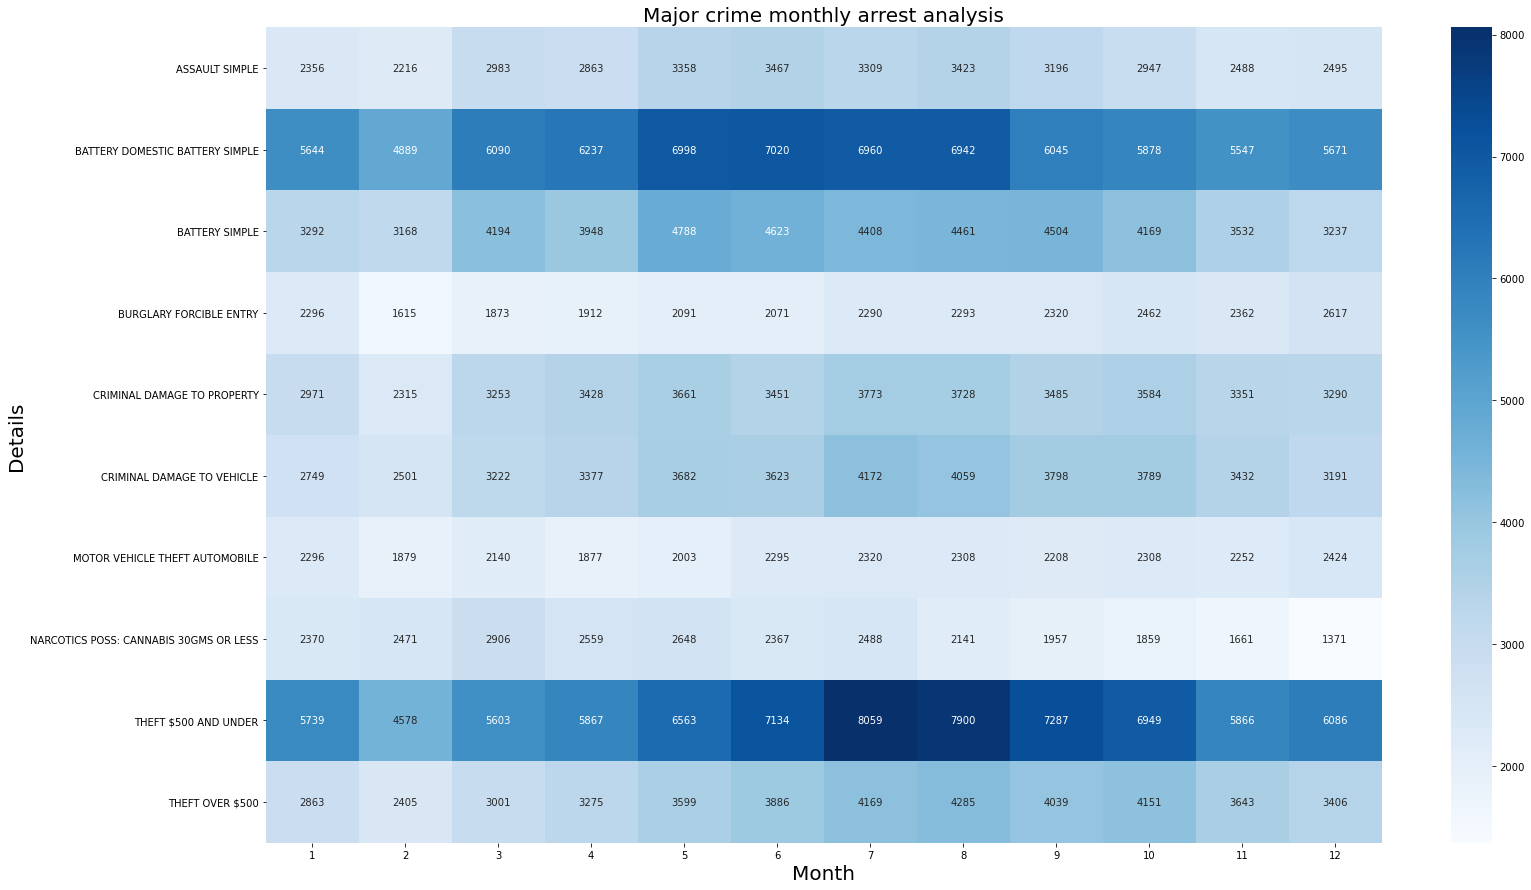

In [18]:
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(111)
ax1.set_title("Major crime monthly arrest analysis",fontsize=20)
ax1.set_ylabel("Details",fontsize=20)
ax1.set_xlabel("Month",fontsize=20)
df_ = pd.DataFrame(df_).reset_index()
df_ = df_[df_["Details"].isin(top_crimes)]

df_ = df_.pivot_table(index="Details",columns="Month",values="Arrest")
df_.fillna(0,inplace=True)

import seaborn as sns
sns.heatmap(df_,cmap="Blues",annot=True,fmt="g")

In [19]:
# chicago map
import folium
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")
locations = df_2014_to_2016.groupby('Community Area').first()
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [20]:
chicago_map

In [21]:

df_2014_to_2016_ = df_2014_to_2016[df_2014_to_2016["Location"].notnull()].dropna()


In [22]:
df_2014_to_2016_["Arrest"] = df_2014_to_2016_["Arrest"].astype("category").cat.codes
df_2014_to_2016_["Domestic"] = df_2014_to_2016_["Domestic"].astype("category").cat.codes
df_2014_to_2016_["X Coordinate"] = df_2014_to_2016_["X Coordinate"].astype("int")
df_2014_to_2016_["X Coordinate"] = df_2014_to_2016_["X Coordinate"].astype("int")
df_2014_to_2016_["Y Coordinate"] = df_2014_to_2016_["Y Coordinate"].astype(str).astype(float).astype(int)
df_2014_to_2016_["Year"] =df_2014_to_2016_["Year"].astype("int")
df_2014_to_2016_["Ward"] = df_2014_to_2016_["Ward"].astype("int")
df_2014_to_2016_["Community Area"] =df_2014_to_2016_["Community Area"] .astype("int")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_2014_to_2016_["Primary Type"])
df_2014_to_2016_["Primary Type"] = le.transform(df_2014_to_2016_["Primary Type"])
le.fit(df_2014_to_2016_["Description"])
df_2014_to_2016_["Description"] = le.transform(df_2014_to_2016_["Description"])
le.fit(df_2014_to_2016_["Location Description"])
df_2014_to_2016_["Location Description"] = le.transform(df_2014_to_2016_["Location Description"])

le.fit(df_2014_to_2016_["IUCR"])
df_2014_to_2016_["IUCR"] = le.transform(df_2014_to_2016_["IUCR"])
le.fit(df_2014_to_2016_["FBI Code"])
df_2014_to_2016_["FBI Code"] = le.transform(df_2014_to_2016_["FBI Code"])

In [23]:
df_final = df_2014_to_2016_.drop(["ID","Case Number","Date","Block","Updated On","Location","Details","Primary Type"],axis=1)

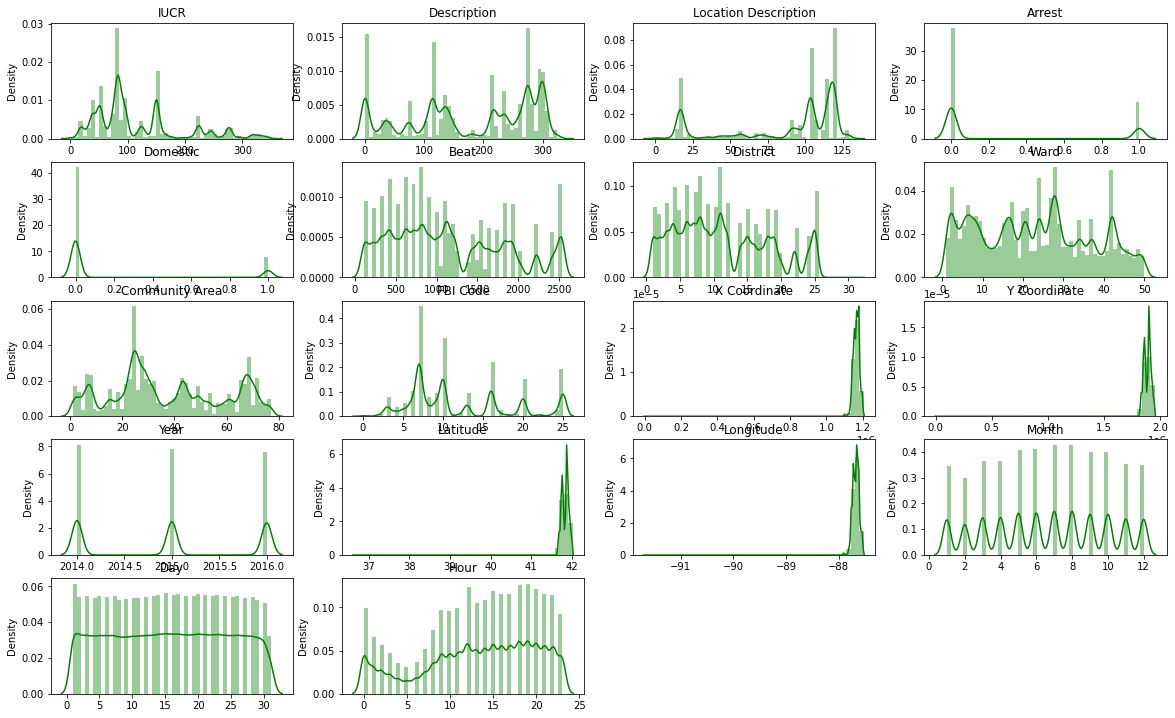

In [24]:
# checking wheather data is normally distributed or not
cols = list(df_final.columns)
fig = plt.figure(figsize=(20,20))
for i , col in enumerate(cols):
    fig.add_subplot(8, 4, i+1)
    sns.distplot(x=df_final[col], color='green')
    plt.title(col)
plt.show()

In [25]:
# Normalizing the data as data is not normally distributed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final = scaler.fit_transform(df_final)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(final,df_2014_to_2016_["Primary Type"],test_size=0.2,random_state=21)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [28]:
pred_y = rf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score as score

In [30]:
print("Accuracy_score = ",score(Y_test,pred_y))

Accuracy_score =  0.9996793535768108
